## Promedio, moda y mediana

In [119]:
import pandas as pd

df = pd.read_csv('../data/raw/spotify_most_streamed_songs.csv', delimiter=",")

In [120]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [122]:
df_stats = df.describe().T
print(df_stats)

                      count         mean          std     min     25%     50%  \
artist_count          953.0     1.556139     0.893044     1.0     1.0     1.0   
released_year         953.0  2018.238195    11.116218  1930.0  2020.0  2022.0   
released_month        953.0     6.033578     3.566435     1.0     3.0     6.0   
released_day          953.0    13.930745     9.201949     1.0     6.0    13.0   
in_spotify_playlists  953.0  5200.124869  7897.608990    31.0   875.0  2224.0   
in_spotify_charts     953.0    12.009444    19.575992     0.0     0.0     3.0   
in_apple_playlists    953.0    67.812172    86.441493     0.0    13.0    34.0   
in_apple_charts       953.0    51.908709    50.630241     0.0     7.0    38.0   
in_deezer_charts      953.0     2.666317     6.035599     0.0     0.0     0.0   
bpm                   953.0   122.540399    28.057802    65.0   100.0   121.0   
danceability_%        953.0    66.969570    14.630610    23.0    57.0    69.0   
valence_%             953.0 

In [123]:
categorical_cols = df.select_dtypes(include=['object']).columns
print('Columnas categoricas: ', categorical_cols)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print('Columnas numericas: ', numerical_cols)

Columnas categoricas:  Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists',
       'in_shazam_charts', 'key', 'mode', 'cover_url'],
      dtype='object')
Columnas numericas:  Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')


In [124]:
#conversion de columnas a tipo numerico
for col in categorical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,NaN,NaN,2,2023,7,14,553,147,141381703.0,43,...,NaN,NaN,80,89,83,31,0,8,4,NaN
1,NaN,NaN,1,2023,3,23,1474,48,133716286.0,48,...,NaN,NaN,71,61,74,7,0,10,4,NaN
2,NaN,NaN,1,2023,6,30,1397,113,140003974.0,94,...,NaN,NaN,51,32,53,17,0,31,6,NaN
3,NaN,NaN,1,2019,8,23,7858,100,800840817.0,116,...,NaN,NaN,55,58,72,11,0,11,15,NaN
4,NaN,NaN,1,2023,5,18,3133,50,303236322.0,84,...,NaN,NaN,65,23,80,14,63,11,6,NaN


In [147]:
#Se eliminan todas las columnas que contengan datos NaN
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned.dropna(axis=0, how='any')
df_cleaned.head()


,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,NaN,2,2023,7,14,553,147,141381703.0,43,263,...,10,826.0,125,80,89,83,31,0,8,4
1,NaN,1,2023,3,23,1474,48,133716286.0,48,126,...,14,382.0,92,71,61,74,7,0,10,4
2,NaN,1,2023,6,30,1397,113,140003974.0,94,207,...,14,949.0,138,51,32,53,17,0,31,6
3,NaN,1,2019,8,23,7858,100,800840817.0,116,207,...,12,548.0,170,55,58,72,11,0,11,15
4,NaN,1,2023,5,18,3133,50,303236322.0,84,133,...,15,425.0,144,65,23,80,14,63,11,6


In [158]:
# Como track_name tiene algunos valores numericos, no me elimina la columna. Asi que lo voy a hacer manualmente
df_cleaned_cleaned = df_cleaned.drop('track_name', axis=1)

df_cleaned_cleaned.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,874.000000,953.000000,896.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,109.740275,2.666317,51.176339,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,178.811406,6.035599,126.487856,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,36.500000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')


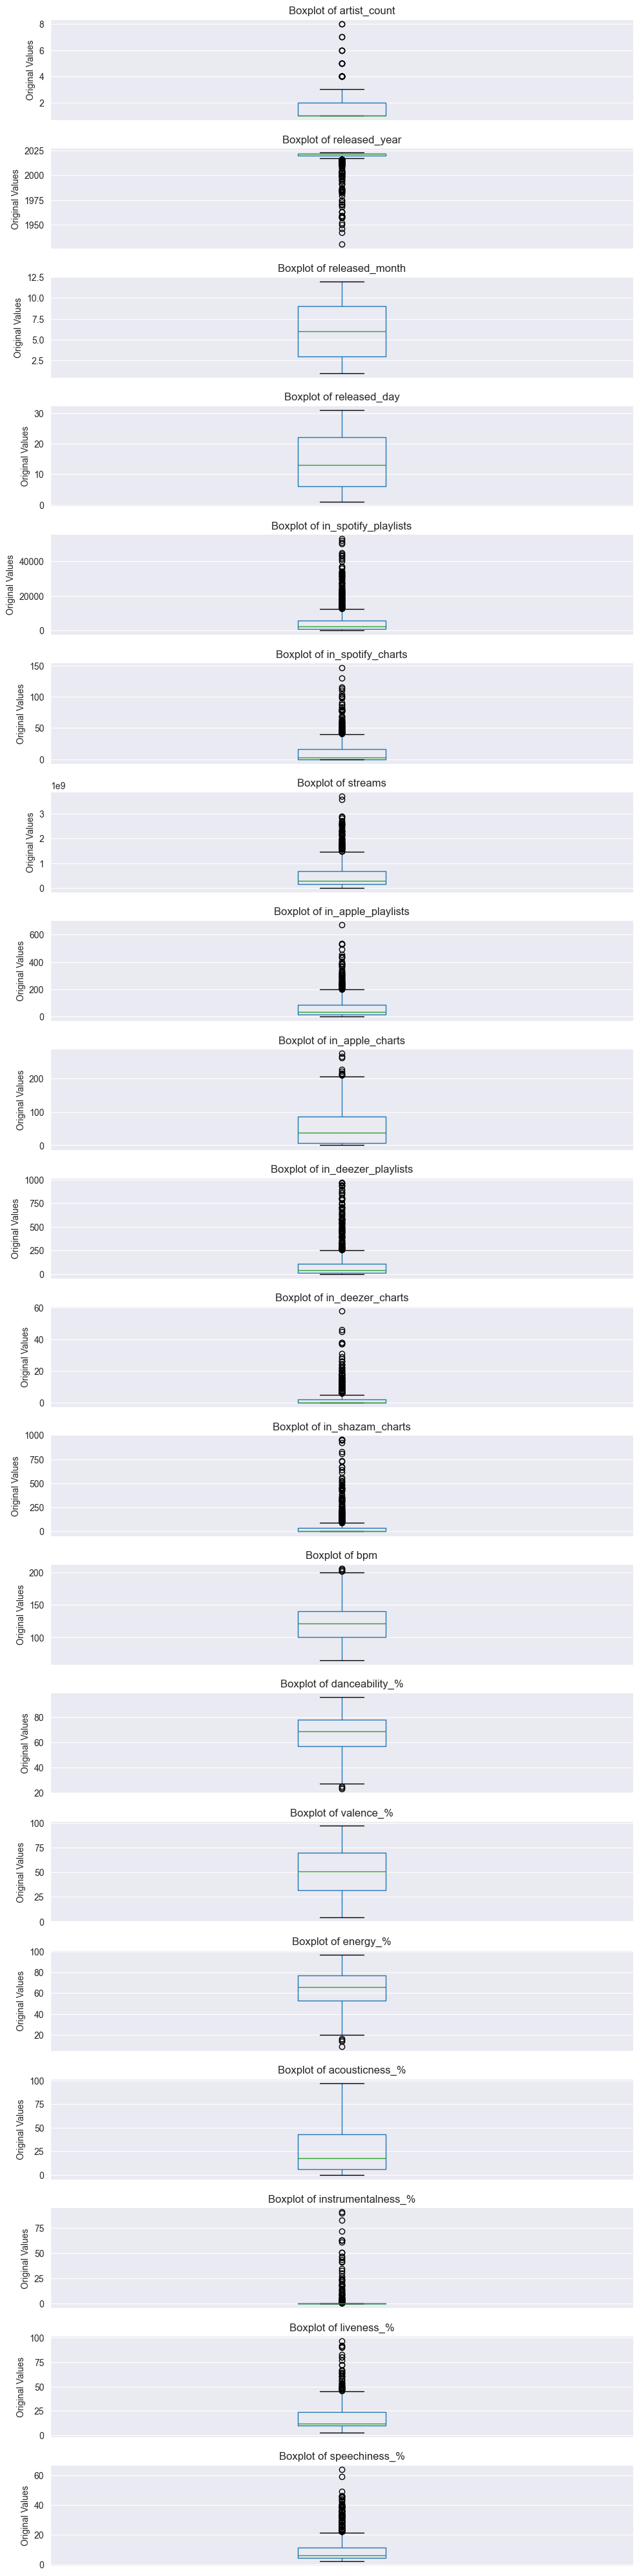

In [149]:
import matplotlib.pyplot as plt

numerical_cols = df_cleaned_cleaned.select_dtypes(include=['int64', 'float64']).columns

print(numerical_cols)

plt.figure(figsize=(10, 40))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    df.boxplot([column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Original Values")
    plt.xticks([])  

plt.tight_layout()
plt.show()

In [159]:
# Vamos a remover outliers
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

cleaned_df = remove_outliers(df_cleaned_cleaned, numerical_cols)

## Matriz de correlación
Para calcular nuestra matriz de correlacion, lo que hicimos fue tomar la base de datos, convertir a valores numericos aquellos campos que no fueran de este tipo y por ultimo eliminar aquellas columnas las cuales fueran todas NaN.
Una vez que 'limpiamos' la base de datos, dibujamos la matriz.

In [160]:
df_cleaned_stats = cleaned_df.describe().T

df_norm = (cleaned_df - df_cleaned_stats['mean']) / df_cleaned_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar

df_norm_stats = df_norm.describe().T
print(df_norm_stats)


                      count          mean  std       min       25%       50%  \
artist_count          316.0  1.573987e-16  1.0 -0.708954 -0.708954 -0.708954   
released_year         316.0 -4.310476e-14  1.0 -5.592954  0.167716  0.167716   
released_month        316.0 -3.372829e-17  1.0 -1.460498 -0.899041 -0.337585   
released_day          316.0 -3.443097e-17  1.0 -1.439663 -0.863068 -0.171154   
in_spotify_playlists  316.0  5.621382e-18  1.0 -1.188207 -0.692010 -0.276427   
in_spotify_charts     316.0  4.497106e-17  1.0 -0.507716 -0.507716 -0.507716   
streams               316.0 -4.497106e-17  1.0 -1.261371 -0.730988 -0.224904   
in_apple_playlists    316.0 -2.248553e-17  1.0 -1.112363 -0.741296 -0.264209   
in_apple_charts       316.0  3.372829e-17  1.0 -0.807363 -0.748551 -0.425084   
in_deezer_playlists   316.0  6.183521e-17  1.0 -1.047897 -0.722434 -0.350476   
in_deezer_charts      316.0 -2.248553e-17  1.0 -0.430294 -0.430294 -0.430294   
in_shazam_charts      316.0  0.000000e+0

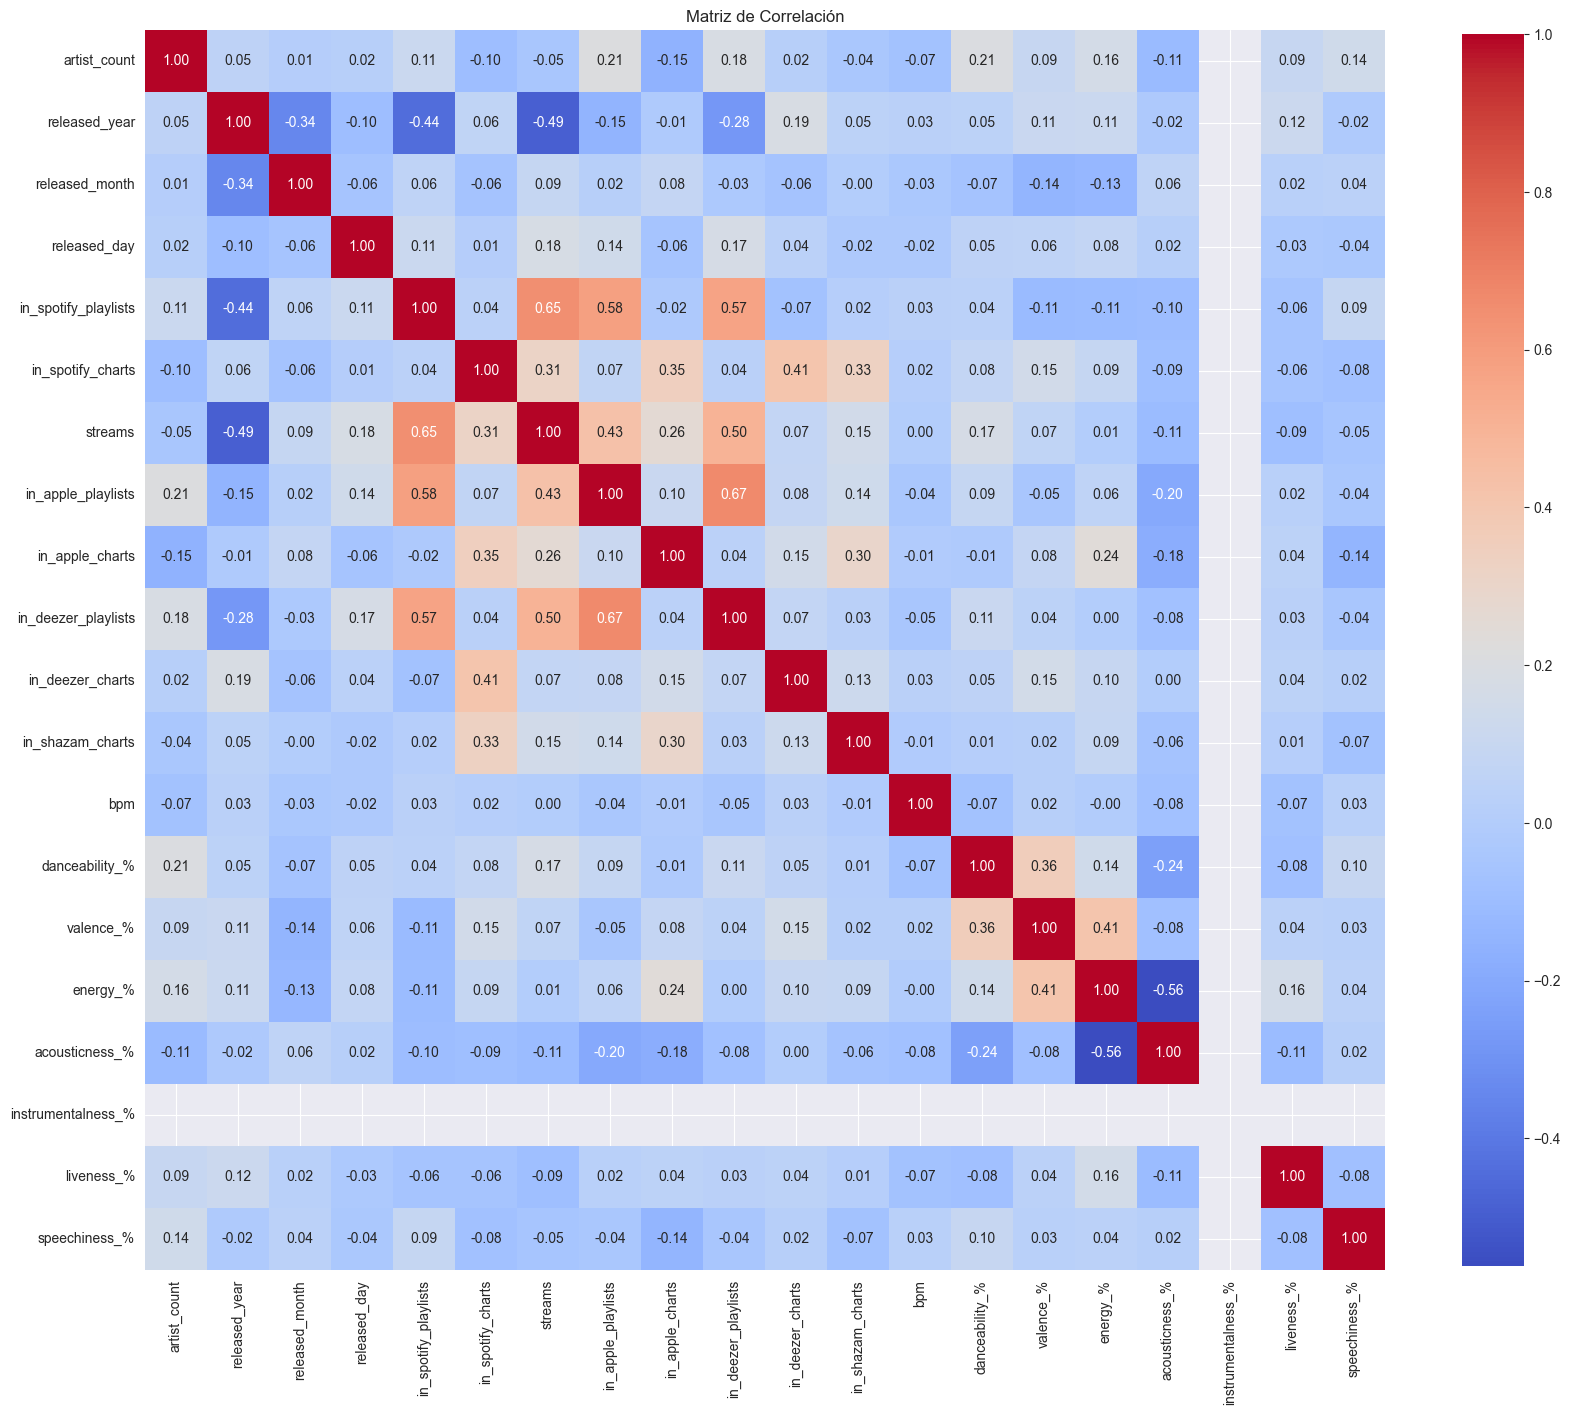

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df_norm.corr(method='pearson')

plt.figure(figsize=(20, 20))

sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación')
plt.show()
